In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/train.csv')

In [3]:
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [4]:
df.isnull().sum()

,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [5]:
df.dtypes

,0
id,int64
Sex,object
Age,int64
Height,float64
Weight,float64
Duration,float64
Heart_Rate,float64
Body_Temp,float64
Calories,float64


In [6]:
df['Sex']= df['Sex'].map({'male':0,'female':1})

In [7]:
df.corr()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,1.000000,0.000065,0.002330,0.000101,0.000524,0.001647,0.001092,0.001612,0.001148
Sex,0.000065,1.000000,-0.009689,-0.755906,-0.818250,0.009594,-0.009122,0.015933,-0.012011
Age,0.002330,-0.009689,1.000000,0.011975,0.073690,0.015656,0.017037,0.030275,0.145683
Height,0.000101,-0.755906,0.011975,1.000000,0.957967,-0.029936,-0.013234,-0.034641,-0.004026
Weight,0.000524,-0.818250,0.073690,0.957967,1.000000,-0.020845,-0.002384,-0.023717,0.015863
Duration,0.001647,0.009594,0.015656,-0.029936,-0.020845,1.000000,0.875327,0.903066,0.959908
Heart_Rate,0.001092,-0.009122,0.017037,-0.013234,-0.002384,0.875327,1.000000,0.795972,0.908748
Body_Temp,0.001612,0.015933,0.030275,-0.034641,-0.023717,0.903066,0.795972,1.000000,0.828671
Calories,0.001148,-0.012011,0.145683,-0.004026,0.015863,0.959908,0.908748,0.828671,1.000000


<Axes: >

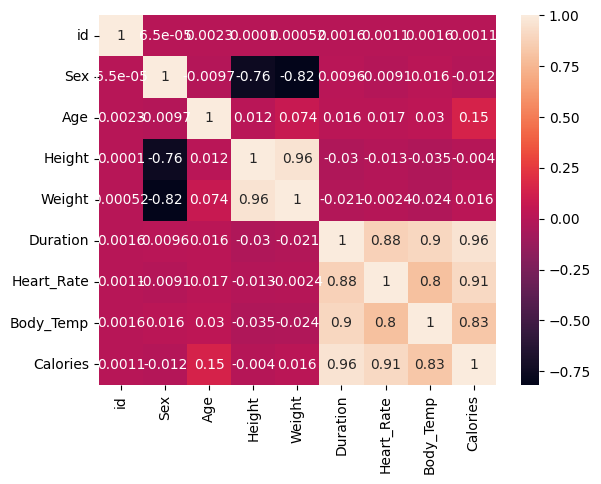

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df = df.drop('id',axis=1)

In [10]:
X = df.drop('Calories', axis =1)
y = df['Calories']

In [11]:
X.shape, y.shape

((750000, 7), (750000,))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((525000, 7), (225000, 7), (525000,), (225000,))

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y_train_log = np.log1p(y_train)
lr.fit(X_train, y_train_log)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)
y_pred = np.expm1(y_pred)

In [17]:
print("Min y_test:", y_test.min())
print("Min y_pred:", y_pred.min())

Min y_test: 1.0
Min y_pred: 1.700599712558717


In [18]:
from sklearn.metrics import root_mean_squared_log_error,r2_score
rmsle = root_mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)
print(rmsle)

R2 score: 0.9160862763255531
0.18015785521210298


In [19]:
from sklearn.linear_model import Lasso
lasso = Lasso()
y_train_log = np.log1p(y_train)
lasso.fit(X_train, y_train_log)
y_pred = lasso.predict(X_test)
y_pred = np.expm1(y_pred)
rmsle = root_mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)
print(rmsle)

R2 score: -0.17762387516656775
0.9650127430967946


In [20]:
from sklearn.linear_model import LassoCV
lcv = LassoCV()
y_train_log = np.log1p(y_train)
lcv.fit(X_train, y_train_log)
y_pred = lcv.predict(X_test)
y_pred = np.expm1(y_pred)
rmsle = root_mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)
print(rmsle)

R2 score: 0.9172323614219396
0.180273245125122


In [21]:
from sklearn.linear_model import Ridge
ridge = Ridge()
y_train_log = np.log1p(y_train)
ridge.fit(X_train, y_train_log)
y_pred = ridge.predict(X_test)
y_pred = np.expm1(y_pred)
rmsle = root_mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)
print(rmsle)

R2 score: 0.9160867723742444
0.1801578605882704


In [22]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV()
y_train_log = np.log1p(y_train)
ridgecv.fit(X_train, y_train_log)
y_pred = ridgecv.predict(X_test)
y_pred = np.expm1(y_pred)
rmsle = root_mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)
print(rmsle)

R2 score: 0.9160867717705093
0.18015786058714442


In [23]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
y_train_log = np.log1p(y_train)
elastic.fit(X_train, y_train_log)
y_pred = elastic.predict(X_test)
y_pred = np.expm1(y_pred)
rmsle = root_mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)
print(rmsle)

R2 score: 0.4179236775364522
0.6293515087175724


In [24]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV()
y_train_log = np.log1p(y_train)
elasticcv.fit(X_train, y_train_log)
y_pred = elasticcv.predict(X_test)
y_pred = np.expm1(y_pred)
rmsle = root_mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)
print(rmsle)

R2 score: 0.9174592352245813
0.18028109035225623


In [25]:
# prompt: pickle ElasticNetCV model

import pickle
filename = 'elasticnetcv_model.pkl'
pickle.dump(elasticcv, open(filename, 'wb'))

In [26]:
# prompt: pickle standard scaler too

# Save the scaler as well
filename_scaler = 'scaler.pkl'
pickle.dump(scaler, open(filename_scaler, 'wb'))
